In [3]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
data_dir='D:\Python\Jigsaw\Python Models'

In [7]:
os.chdir(data_dir)

In [9]:
hr_data=pd.read_csv('hr.csv')

In [11]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [16]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [18]:
hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [21]:
hr_data.rename(columns={'sales':'dept'},inplace=True)

In [23]:
hr_data['salary'].head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [25]:
X=hr_data.drop('left',axis=1)
y=hr_data['left']

In [27]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [29]:
X=pd.get_dummies(X)

In [31]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                     base_estimator=DecisionTreeClassifier())

In [39]:
clf.fit(X_train,y_train)

C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [41]:
clf.oob_score_

0.9876656388032335

In [43]:
clf.score(X_test,y_test)

0.986

In [44]:
## Parameter tuning

In [54]:
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                         base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('******************')

C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9834152846070506
******************
For n_estimators = 30
OOB score is 0.9887490624218684
******************
For n_estimators = 50
OOB score is 0.9894157846487207
******************
For n_estimators = 70
OOB score is 0.9896658054837904
******************
For n_estimators = 90
OOB score is 0.9899991665972164
******************
For n_estimators = 110
OOB score is 0.9899991665972164
******************
For n_estimators = 130
OOB score is 0.9903325277106425
******************
For n_estimators = 150
OOB score is 0.9904992082673556
******************
For n_estimators = 170
OOB score is 0.9902491874322861
******************
For n_estimators = 190
OOB score is 0.9901658471539295
******************
For n_estimators = 210
OOB score is 0.9902491874322861
******************
For n_estimators = 230
OOB score is 0.9902491874322861
******************
For n_estimators = 250
OOB score is 0.9901658471539295
******************
For n_estimators = 270
OOB score is 0.99033

In [56]:
# Finalizing on a tree model with 150 trees
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=150,random_state=400,
                     base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [58]:
# Feature Importance
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                       

In [61]:
print (clf.estimators_[0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1859118377, splitter='best')


In [64]:
print (clf.estimators_[0].feature_importances_)

[5.05185266e-01 1.32251724e-01 1.09587124e-01 7.25383689e-02
 1.56214185e-01 9.76820763e-04 3.25164961e-04 9.23689326e-04
 1.08236025e-03 2.53569257e-03 4.89440705e-04 1.25078175e-03
 8.91752891e-04 8.14953601e-04 2.43254883e-03 2.96508657e-03
 3.16484751e-03 5.68842690e-04 4.96944845e-03 8.31900643e-04]


In [66]:
# we can extract feature importances from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [69]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [71]:
feature_importance.sort_values(ascending=False)

satisfaction_level       0.494260
last_evaluation          0.138175
time_spend_company       0.137465
number_project           0.110373
average_montly_hours     0.097373
dept_technical           0.003132
salary_low               0.003084
dept_support             0.002837
dept_sales               0.002542
salary_medium            0.002088
Work_accident            0.001566
dept_IT                  0.001562
dept_accounting          0.001390
salary_high              0.000880
dept_marketing           0.000712
dept_product_mng         0.000667
dept_RandD               0.000642
dept_hr                  0.000590
dept_management          0.000490
promotion_last_5years    0.000174
dtype: float64

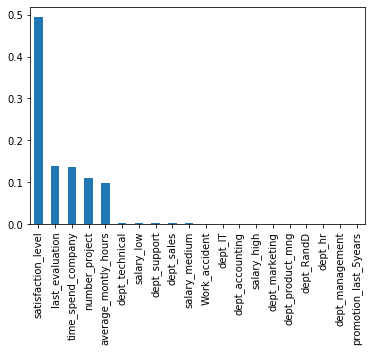

In [73]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [79]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [81]:
clf.oob_score_

0.9905825485457121

In [86]:
for w in range(10,300,20):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('**********************')

C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9832486040503375
**********************
For n_estimators = 30
OOB score is 0.9894991249270773
**********************
For n_estimators = 50
OOB score is 0.990082506875573
**********************
For n_estimators = 70
OOB score is 0.9905825485457121
**********************
For n_estimators = 90
OOB score is 0.9904992082673556
**********************
For n_estimators = 110
OOB score is 0.9908325693807817
**********************
For n_estimators = 130
OOB score is 0.9908325693807817
**********************
For n_estimators = 150
OOB score is 0.9905825485457121
**********************
For n_estimators = 170
OOB score is 0.9909992499374948
**********************
For n_estimators = 190
OOB score is 0.9909159096591382
**********************
For n_estimators = 210
OOB score is 0.9908325693807817
**********************
For n_estimators = 230
OOB score is 0.9908325693807817
**********************
For n_estimators = 250
OOB score is 0.9907492291024252
***************

In [90]:
# Finalizing 190 trees as OOB score is going slow later
clf=RandomForestClassifier(n_estimators=190,oob_score=True,n_jobs=-1,random_state=400)

In [92]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [94]:
clf.oob_score_

0.9909159096591382

In [97]:
clf.feature_importances_

array([0.3138384 , 0.12430711, 0.18396834, 0.1514369 , 0.17650121,
       0.01018415, 0.00196677, 0.00182788, 0.0017952 , 0.00173233,
       0.00172401, 0.00170841, 0.00123802, 0.00118133, 0.00353554,
       0.00299638, 0.00370561, 0.00560635, 0.00722435, 0.00352169])

In [99]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [101]:
imp_feat.sort_values(ascending=False)

satisfaction_level       0.313838
number_project           0.183968
time_spend_company       0.176501
average_montly_hours     0.151437
last_evaluation          0.124307
Work_accident            0.010184
salary_low               0.007224
salary_high              0.005606
dept_technical           0.003706
dept_sales               0.003536
salary_medium            0.003522
dept_support             0.002996
promotion_last_5years    0.001967
dept_IT                  0.001828
dept_RandD               0.001795
dept_accounting          0.001732
dept_hr                  0.001724
dept_management          0.001708
dept_marketing           0.001238
dept_product_mng         0.001181
dtype: float64

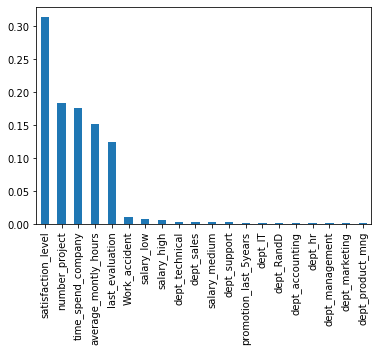

In [102]:
imp_feat.sort_values(ascending=False).plot(kind='bar')